# Zadania rekrutacyjne - MedicalAlgorithms
Bartłomiej Klimowski - 29.10.18

In [38]:
%matplotlib inline
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.utils import resample

from statsmodels.stats.weightstats import ttost_ind
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams

# figure size in inches
style.use('ggplot')
rcParams['figure.figsize'] = 10,7

## Zadanie 1
**Podpunkt 1** Dane są dwa zbiory obserwacji A i B (pliki: A.csv, B.csv). Zweryfikuj hipotezy, że obserwacje
ze zbioru A pochodzą z rozkładu normalnego oraz, że obserwacje ze zbioru B pochodzą z
rozkadu normalnego.
+ Opisz sposób weryfikacji hipotez, podaj p-value.

## Analiza Eksploracyjna
Przed przystąpieniem do jakichkolwiek testów przyjrzyjmy się samym zbiorom danych.

In [95]:
A = pd.read_csv("A.csv")
B = pd.read_csv("B.csv")

Text(0.5, 1.0, 'Histogramy zbiorów A i B')

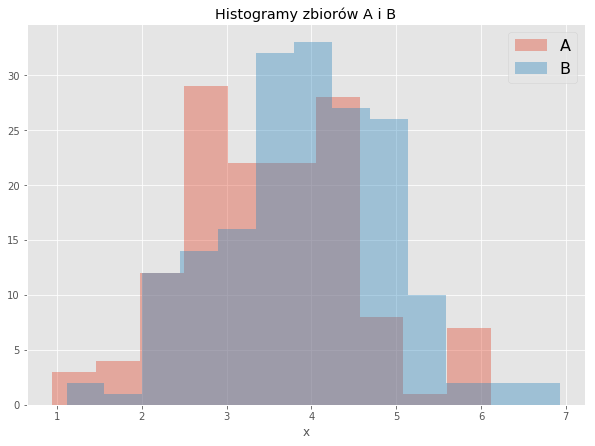

In [96]:
sns.distplot(A["x"], kde=False)
sns.distplot(B["x"], kde=False)
plt.legend(("A","B"), prop={'size': 16})
plt.title("Histogramy zbiorów A i B")

In [97]:
# porównanie podstawowych statystyk badanych zbiorów
A_describe = A.describe()
B_describe = B.describe()
A_describe.columns = ["A"]
B_describe.columns = ["B"]
datasets_description = pd.concat([A_describe, B_describe], axis=1, sort=False)
datasets_description

,A,B
count,136.000000,179.000000
mean,3.510475,3.938122
std,1.053580,0.996429
min,0.945807,1.113184
25%,2.726772,3.331260
50%,3.493919,3.986899
75%,4.169715,4.616855
max,6.119664,6.926329


In [98]:
#porównanie różnic
datasets_description['A'] - datasets_description['B']

count   -43.000000
mean     -0.427647
std       0.057151
min      -0.167377
25%      -0.604488
50%      -0.492980
75%      -0.447140
max      -0.806665
dtype: float64

In [181]:
#porównanie różnic w odniesieniu do średiej zbioru A (W PROCENTACH!)
((datasets_description['A'] - datasets_description['B'])/datasets_description['A'].mean())[1:] * 100

mean   -2.165026
std     0.289336
min    -0.847372
25%    -3.060313
50%    -2.495785
75%    -2.263714
max    -4.083862
dtype: float64

## Testowanie normalnośći rozkładów

In [182]:
## Wykresy QQ 

Text(0.5, 1.0, 'QQ plot zbioru A')

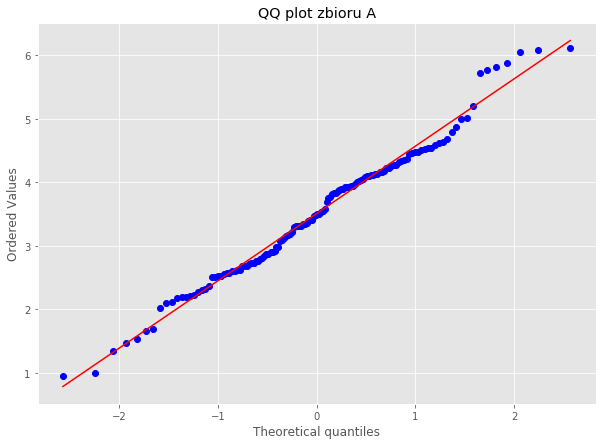

In [183]:
qqplot_A = st.probplot(A['x'],dist="norm", plot=plt)
plt.title("QQ plot zbioru A")

Text(0.5, 1.0, 'QQ plot zbioru B')

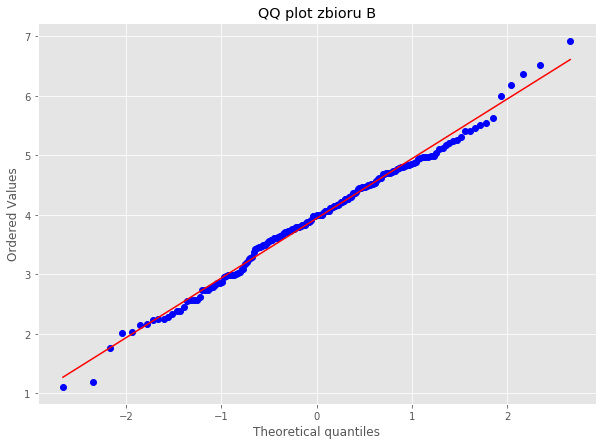

In [184]:
qqplot_B = st.probplot(B['x'],dist="norm", plot=plt)
plt.title("QQ plot zbioru B")

## Testy na normalność rozkładu

Do zweryfikowania tego, ze próbki pochodzą z rozkładów normalnych wykorzystano test Shapiro-Wilka (SW) i D'Agoistino ($K^2$). Pierwszy jest standardowym wyborem ze względu na swoją najwiekszą moc, w porównaniu do pozostałych testów. Test $K^2$ wzięto w ramach odniesienia, jak równiez dlatego, że bazuje na innych miarach (skośności i kurtozie)  
  
Oba testy przyjmują nastepującą hipotezę zerową:   
$H_0$ - próbki pochodzą z rozkładu normalnego

In [146]:
print("Wynik testu SW (p-value) dla zbioru A:",np.round(st.shapiro(A['x']),2)[1])
print("Wynik testu SW (p-value) dla zbioru B:",np.round(st.shapiro(B['x']),2)[1])

Wynik testu SW (p-value) dla zbioru A: 0.17
Wynik testu SW (p-value) dla zbioru B: 0.54


In [147]:
print("Wynik testu K^2 (p-value) dla zbioru A:",np.round(st.normaltest(A['x']),2)[1])
print("Wynik testu K^2 (p-value) dla zbioru B:",np.round(st.normaltest(B['x']),2)[1])

Wynik testu K^2 (p-value) dla zbioru A: 0.74
Wynik testu K^2 (p-value) dla zbioru B: 0.63


Jak widać, zaden z testów nie osiągnął wartości p_value<0.05. Zgodnie z standartowymi wytycznymi, powinniśmy przyjąć hipotezę zerową i uznać że nie mamy przesłanek sądzić, że dane nie pochodzą z rozkładów normalnych.

**Podpunkt 2** Widząc, że obserwacje z obu zbiorów pochodzą z rozkładów normalnych o takiej samej
wariancji zweryfikuj hipotezę, że wartość oczekiwana zbioru A jest mniejsza niż wartość
oczekiwana zbioru B.
+ Opisz sposób weryfikacji hipotezy, podaj p-value.

## Wariancja

W treści zadania sprecyzowano żeby założyć takie same wariancję, jednak dla ciekawości to zewryfikujmy testem Levena, o hipotezie zerowej:  
$H_0:$ próbki pochodzą z rozkładów o takich samych wariancjach

In [148]:
st.levene(A['x'],B['x'])

LeveneResult(statistic=1.021217877898355, pvalue=0.313010854759847)

Nie ma istotnie statystycznych przesłanek, że dane pochodzą z rozkładów o innych wariancjach.

# Testy

W przypadku kiedy mamy takie same wariancje i dane pochodzą z rozkładu normalnego standartowym podejsciem dla porównania dwóch niezaleznych serii pomiarowych jest zastosowanie testu t-studenta:  
$H_0: \mu_a = \mu_b$  
$H_A: \mu_a < \mu_b$ 

In [141]:
st.ttest_ind(A['x'],B['x'],equal_var = True)

Ttest_indResult(statistic=-3.6804397441960695, pvalue=0.00027409193981892295)

Zweryfikujmy też hipotezę przy użyciu testu nieparametrycznego (nie zakładjacego własności rozkładów z których pochodzą próbki). Wybór padł na test Manna-Witneya

In [145]:
st.mannwhitneyu(A['x'],B['x'], alternative='less')

MannwhitneyuResult(statistic=9162.0, pvalue=8.53762182471911e-05)

Jak widać w obu przypadkach pvalue jest mniejsze niż 0.05, czyli odrzucamy hipotezę zerową i przyjmujemy, że wartość oczekiwania rozkładu A jest mniejsza niż B. 

Alternatywnym i dającym więcej informacji podejściem jest TOST(Equivalence test) gdzie wykonujemy dwa jednostronne testy t-studenta z których uzyskujemy przedział gdzie znajduje się róznica średnich rozkładów

In [166]:
#arbitralnie przyjęta wartość
treshold = ((A['x'].std() + B['x'].std())/2)

In [167]:
tost = ttost_ind(A['x'],B['x'],-treshold,-treshold/6)

In [168]:
print("pvalue procedury TOST:",np.round(tost[0],2))

pvalue procedury TOST: 0.01


In [169]:
#Zakresy
print(np.round(-treshold,2))
print(np.round(-treshold/6,2))

-1.03
-0.17


**Odpowiedź**:Wartość oczekiwana zbioru A jest mniejsza niż zbioru B (p_value < 0.05). Róznica ich średnich $\mu_A - \mu_B$ mieści się w zakresie <-1.03, -0.17> (p_value = 0.01)  
(Przedział można lepiej zoptymalizować, jednak z braku czasu pozostaje taki) 

# Zadanie 2

Spośród 400 skrzyń zawierających taką samą liczbę zaworów przygotowanych do wysyłki
wylosowano 20 skrzyń i znajdujące się w nich zawory poddano szczegółowej kontroli.
W rezultacie wykryto następujące liczby braków: 0, 4, 3, 6, 0, 2, 1, 1, 4, 3, 5, 2, 3, 1, 2, 5, 4, 2, 1, 0
+ Skonstruuj 95% przedział ufności dla całkowitej liczby braków we wszystkich (400)
skrzyniach, opisz sposób konstrukcji przedziału.

In [61]:
smpl = np.array([0, 4, 3, 6, 0, 2, 1, 1, 4, 3,
                 5, 2, 3, 1, 2, 5, 4, 2, 1, 0])

W przypadku estymacji średniej postępujemy standardowym podejsciem, z tym wyjątkiem, że uwzgledniamy względnie małą liczbę próbek i wartości krytyczne bierzemy z rozkładu t-studenta ( o n-1 stopniach swobody)

In [186]:
smpl_ci = st.t.interval(0.95, len(smpl)-1, loc=np.mean(smpl), scale=st.sem(smpl))

Zeby otrzymać wartości dla wszystkich skrzyń, z własności średniej możemy przemnozyć krańce przedziałów przez ilość elementów:

In [187]:
(400*np.array(smpl_ci)).round()

array([ 645., 1315.])

**Odpowiedź:** Dla 95% poziomu istotności przedział ufności całkowitej liczby braków zaworów wynosi (645, 1315)

# Zadanie 3
Wartości w każdym wierszu pliku examinations.csv to dni od momentu rozpoczęcia badania,
w których zaobserwowano objawy pewnej choroby u pacjenta podczas trwania tego badania.
Zweryfikuj hipotezę, że liczba badań, w których zaobserwowano chorobę po raz pierwszy po
mniej niż 10 dniach jest mniejsza niż liczba badań, w których zaobserwowano chorobę po raz
pierwszy po mniej niż 30 dniach.
+ Opisz sposób weryfikacji hipotezy, podaj p-value. Możesz użyć metody bootstrap.

Albo tego zadania nie rozumiem, albo wkradł się błąd. Naturalnym jest, że dla dni <10 liczba obserwacji choroby po raz pierwszy będzie mniejsza (w skrajnym przypadku równa) niż dla <30 dni. Pierwszy przedział zawiera się w drugim.  
Poniżej jest zaimplementowana prosta procedura bootstrapowa sprawdzająca warunki zadania, jednak jej wynik jest oczywisty - każda wylosowana podgrupa miała mniej pierwszych obserwacji w dniach <10 niż <30. 
W kwestii obliczania p-value/przedziałów ufności - znam tylko metody dla ciągłych wielkosci mierzonych w wylosowanych podgrupach, na znalezienie i zaimplementowanie jakiejs dla danych binarnych potrzebowałbym więcej czasu.

In [188]:
# wczytujemy tylko dni pierwszej obserwacji
examinations = []
with open('examinations.csv', newline='\n') as csvfile:
         reader = csv.reader(csvfile)
         for ix, row in enumerate(reader):
            examinations.append(list(map(int,row[0].split(';')))[0])

IndexError: list index out of range

In [189]:
examinations = np.array(examinations)

In [190]:
#liczba diagnoz przed 10 dniem
examinations[examinations < 10].shape[0]

1518

In [191]:
#liczba diagnoz przed 30 dniem
examinations[examinations < 30].shape[0]

1998

In [192]:
def bootstrap(data, n_iter, n_size):
    stats = []
    for ii in range(n_iter):
        bootstrap_smp = resample(data, n_samples=n_size)
        score = int((bootstrap_smp[bootstrap_smp < 10].shape[0]) < (bootstrap_smp[bootstrap_smp < 30].shape[0]))
        stats.append(score)
        
    return (np.sum(stats)/np.shape(stats)[0]) * 100

In [193]:
bootstrap(examinations,1000,int(examinations.shape[0]*0.8))

100.0